# Import Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 1. Baca data CSV
df = pd.read_csv("scrapped_Tiktok_EN.csv")  # Ganti dengan path file aslimu


In [3]:
df = df.dropna(subset=["content"])  # Hapus baris dengan content kosong
reviews = df["content"].astype(str)  # Konversi ke string

In [4]:
df["at"] = pd.to_datetime(df["at"])  # Ubah ke format tanggal
df_filtered = df[df["at"].dt.year == 2024]

df_filtered.shape


(18996, 11)

In [5]:
df = df_filtered.sample(min(len(df_filtered), 6000), random_state=42)  # Ambil 6000 data 
df.score.value_counts()

score
1    2196
5    1892
3     672
4     633
2     607
Name: count, dtype: int64

In [6]:
import re
import string
from typing import List
from nltk.tokenize import word_tokenize

# preprocess_and_tokenize

def tokenize(text: str) -> List[str]:
    # 1. Bersihkan teks (menghapus mention, hashtag, URL, angka, RT, dan tanda baca)
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)  # Hapus mention (@user)
    text = re.sub(r'#\w+', '', text)  # Hapus hashtag (#hashtag)
    text = re.sub(r"\d+", "", text)  # Hapus angka
    text = re.sub(r'RT[\s]+', '', text)  # Hapus "RT"
    text = re.sub(r'https?://\S+', '', text)  # Hapus URL
    text = text.translate(str.maketrans("", "", string.punctuation))  # Hapus tanda baca
    text = text.lower().strip()  # Konversi ke lowercase dan hapus spasi berlebih

    # 2. Tokenisasi menggunakan word_tokenize dari NLTK
    tokens = word_tokenize(text)

    return tokens  # Output dalam bentuk list kata


In [7]:
df["tokens"] = df["content"].apply(tokenize)
df[["content", "tokens"]].head()  # Cek hasil tokenisasi

,content,tokens
2360,Why can't I put caption on my repost?!?!!,"[why, cant, i, put, caption, on, my, repost]"
9545,Sometimes I can't open it please fix it,"[sometimes, i, cant, open, it, please, fix, it]"
42,"I hate tiktok, When I want to create a new acc...","[i, hate, tiktok, when, i, want, to, create, a..."
3887,It has many bugs it's not worth it to install ...,"[it, has, many, bugs, its, not, worth, it, to,..."
3710,Earning coins while watching,"[earning, coins, while, watching]"


In [8]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words("english"))

def remove_stopwords(tokens):
    return [word for word in tokens if word.lower() not in stop_words]

df["tokens_no_stopwords"] = df["tokens"].apply(remove_stopwords)

print(df[["tokens", "tokens_no_stopwords"]].head())  # Cek hasilnya


                                                 tokens  \
2360       [why, cant, i, put, caption, on, my, repost]   
9545    [sometimes, i, cant, open, it, please, fix, it]   
42    [i, hate, tiktok, when, i, want, to, create, a...   
3887  [it, has, many, bugs, its, not, worth, it, to,...   
3710                  [earning, coins, while, watching]   

                                    tokens_no_stopwords  
2360                       [cant, put, caption, repost]  
9545               [sometimes, cant, open, please, fix]  
42    [hate, tiktok, want, create, new, account, ran...  
3887    [many, bugs, worth, install, hope, tiktok, fix]  
3710                         [earning, coins, watching]  


In [9]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
stemmer = PorterStemmer()

def stemming(tokens):
    return [stemmer.stem(word) for word in tokens]

df["tokens_stemmed"] = df["tokens_no_stopwords"].apply(stemming)

# print(df[["tokens_no_stopwords", "tokens_stemmed"]].head())  # Cek hasilnya
# df[["tokens_no_stopwords", "tokens_stemmed"]].head()


In [10]:
# import nltk
# nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def lemmatization(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

df["tokens_lemmatized"] = df["tokens_no_stopwords"].apply(lemmatization)

# print(df[["tokens_no_stopwords", "tokens_lemmatized"]].head())  # Cek hasilnya


In [11]:
df[["tokens_no_stopwords", "tokens_stemmed", "tokens_lemmatized"]].head()

,tokens_no_stopwords,tokens_stemmed,tokens_lemmatized
2360,"[cant, put, caption, repost]","[cant, put, caption, repost]","[cant, put, caption, repost]"
9545,"[sometimes, cant, open, please, fix]","[sometim, cant, open, pleas, fix]","[sometimes, cant, open, please, fix]"
42,"[hate, tiktok, want, create, new, account, ran...","[hate, tiktok, want, creat, new, account, rand...","[hate, tiktok, want, create, new, account, ran..."
3887,"[many, bugs, worth, install, hope, tiktok, fix]","[mani, bug, worth, instal, hope, tiktok, fix]","[many, bug, worth, install, hope, tiktok, fix]"
3710,"[earning, coins, watching]","[earn, coin, watch]","[earning, coin, watching]"


In [12]:
def label_sentiment(score):
  if score <= 2:
    return 0
  else:
    return 1

df['sentimen'] = df['score'].apply(label_sentiment)

In [13]:
sentiment_counts = df.sentimen.value_counts()
sentiment_counts

sentimen
1    3197
0    2803
Name: count, dtype: int64

In [14]:
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,tokens,tokens_no_stopwords,tokens_stemmed,tokens_lemmatized,sentimen
2360,aed8e7d9-f07c-4eb4-aaad-623e8749eaa3,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Why can't I put caption on my repost?!?!!,1,0,37.0.4,2024-10-26 09:03:07,NaN,NaN,37.0.4,"[why, cant, i, put, caption, on, my, repost]","[cant, put, caption, repost]","[cant, put, caption, repost]","[cant, put, caption, repost]",0
9545,a6ef5e66-de49-4a93-b98a-c66bc686bc9d,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Sometimes I can't open it please fix it,4,0,28.5.4,2024-08-18 16:02:28,NaN,NaN,28.5.4,"[sometimes, i, cant, open, it, please, fix, it]","[sometimes, cant, open, please, fix]","[sometim, cant, open, pleas, fix]","[sometimes, cant, open, please, fix]",1
42,2d33acbf-a885-441a-8a12-3d649a84c217,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"I hate tiktok, When I want to create a new acc...",1,25,37.2.6,2024-11-19 11:52:07,NaN,NaN,37.2.6,"[i, hate, tiktok, when, i, want, to, create, a...","[hate, tiktok, want, create, new, account, ran...","[hate, tiktok, want, creat, new, account, rand...","[hate, tiktok, want, create, new, account, ran...",0
3887,9167075e-8c4c-46c9-825d-3035bfea9117,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,It has many bugs it's not worth it to install ...,1,0,NaN,2024-10-10 11:27:00,NaN,NaN,NaN,"[it, has, many, bugs, its, not, worth, it, to,...","[many, bugs, worth, install, hope, tiktok, fix]","[mani, bug, worth, instal, hope, tiktok, fix]","[many, bug, worth, install, hope, tiktok, fix]",0
3710,762ea22c-531a-470b-be7f-91b218adfca6,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Earning coins while watching,5,0,36.7.4,2024-10-12 09:57:52,NaN,NaN,36.7.4,"[earning, coins, while, watching]","[earning, coins, watching]","[earn, coin, watch]","[earning, coin, watching]",1


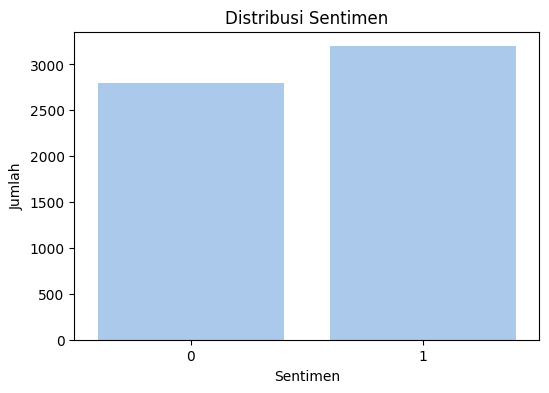

In [15]:
# Visualisasi
sns.set_palette("pastel")
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='sentimen')
plt.title('Distribusi Sentimen')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.show()

In [16]:
# data_negatif = df[df['sentimen'] == "Negatif"]
# data_positif = df[df['sentimen'] == "Positif"]
data_negatif = df[df['sentimen'] == 0]
data_positif = df[df['sentimen'] == 1]

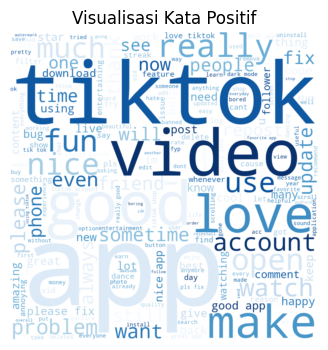

In [17]:
from wordcloud import WordCloud

all_text_s1 = ' '.join(word for word in data_positif['content'])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, background_color='white', mode="RGBA").generate(all_text_s1)
plt.figure(figsize=(6,4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Visualisasi Kata Positif")
plt.show()


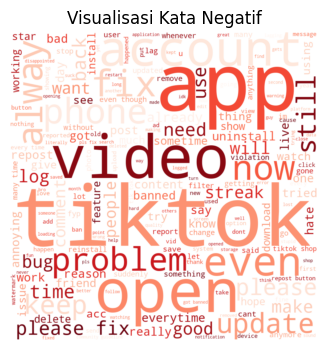

In [18]:
all_text_s0 = ' '.join(word for word in data_negatif['content'])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, background_color='white', mode="RGBA").generate(all_text_s0)
plt.figure(figsize=(6,4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Visualisasi Kata Negatif")
plt.show()


In [19]:
total_corpus = set(word for tokens in df["tokens_lemmatized"] for word in tokens)

word_count_list = []
for tokens in df["tokens_lemmatized"]:
    word_count = dict.fromkeys(total_corpus, 0)
    for word in tokens:
        word_count[word] += 1
    word_count_list.append(word_count)


In [20]:
# word_counts = []

# # Iterasi setiap review dalam dataset
# for tokens in df["tokens"]:
#     word_count = dict.fromkeys(total_corpus, 0)  # Inisialisasi semua kata dengan 0
#     for word in tokens:
#         word_count[word] += 1  # Hitung kemunculan kata dalam review
#     word_counts.append(word_count)

# # Konversi ke DataFrame
# freq_df = pd.DataFrame(word_counts)

# # Menampilkan semua baris (opsional, bisa menyebabkan output panjang)
# pd.set_option("display.max_rows", None)

# # Tampilkan DataFrame Transpose agar lebih mudah dibaca
# freq_df.T.head(5)


In [21]:
def compute_tf(tokens):
    total_words = len(tokens)
    if total_words == 0:
        return {}
    tf = {word: tokens.count(word) / total_words for word in set(tokens)}
    return tf

df["tf"] = df["tokens_lemmatized"].apply(compute_tf)
df[["tokens_lemmatized", "tf"]]



,tokens_lemmatized,tf
2360,"[cant, put, caption, repost]","{'repost': 0.25, 'cant': 0.25, 'put': 0.25, 'c..."
9545,"[sometimes, cant, open, please, fix]","{'please': 0.2, 'cant': 0.2, 'fix': 0.2, 'open..."
42,"[hate, tiktok, want, create, new, account, ran...","{'use': 0.027777777777777776, 'want': 0.027777..."
3887,"[many, bug, worth, install, hope, tiktok, fix]","{'hope': 0.14285714285714285, 'install': 0.142..."
3710,"[earning, coin, watching]","{'watching': 0.3333333333333333, 'coin': 0.333..."
...,...,...
6383,"[nice, good, app, 💯]","{'💯': 0.25, 'nice': 0.25, 'app': 0.25, 'good':..."
944,"[past, day, try, open, tiktok, blocking, phone...","{'fixbut': 0.027777777777777776, 'improvement'..."
11098,"[tiktok, kept, violating, video, even, tho, ru...","{'violating': 0.07692307692307693, 'even': 0.0..."
9840,"[reinstall, get, app, everytime]","{'reinstall': 0.25, 'everytime': 0.25, 'app': ..."


In [22]:
def compute_idf(df):
    N = len(df)  # Jumlah total dokumen
    total_corpus = set(word for tokens in df["tokens_lemmatized"] for word in tokens)  # Semua kata unik

    # Hitung DF (jumlah dokumen yang mengandung kata)
    df_counts = {word: sum(1 for tokens in df["tokens_lemmatized"] if word in tokens) for word in total_corpus}

    # Hitung IDF dengan smoothing (agar tidak ada nilai negatif atau nol)
    idf = {word: np.log((N + 1) / (df_counts[word] + 1)) + 1 for word in total_corpus}
    return idf

idf_values = compute_idf(df)  # Simpan nilai IDF untuk setiap kata


In [23]:
print(len(idf_values))  # Harus sesuai dengan jumlah dokumen dalam dataset

7005


In [24]:
idf_values

{'revisit': 9.006534220429568,
 'happygolucky': 9.006534220429568,
 'keyed': 9.006534220429568,
 'severe': 9.006534220429568,
 'jamming': 9.006534220429568,
 'history': 6.703949127435522,
 'logo': 6.608638947631197,
 'mag': 7.907921931761458,
 'forth': 9.006534220429568,
 'parcel': 8.601069112321403,
 'waiting☠️': 9.006534220429568,
 'limitizing': 9.006534220429568,
 'useinteresting': 9.006534220429568,
 'solat': 9.006534220429568,
 'provocative': 9.006534220429568,
 'tanpa': 9.006534220429568,
 'posible': 9.006534220429568,
 'fire': 7.6202398593096765,
 'dancemy': 9.006534220429568,
 'edge': 9.006534220429568,
 'penambahbaikan': 9.006534220429568,
 'hlget': 9.006534220429568,
 'troublesome': 8.313387039869621,
 'violates': 7.753771251934199,
 'verification': 7.060624071374254,
 'good💯💯': 9.006534220429568,
 'influence': 7.907921931761458,
 'iwe': 9.006534220429568,
 'discouraged': 9.006534220429568,
 'key': 8.601069112321403,
 'political': 8.601069112321403,
 'timing': 9.0065342204295

In [25]:
def compute_tfidf(tf_dict, idf_dict):
    return {word: tf_dict[word] * idf_dict[word] for word in tf_dict.keys()}

df["tfidf"] = df["tf"].apply(lambda tf: compute_tfidf(tf, idf_values))
df[["tokens_lemmatized", "tfidf"]]


,tokens_lemmatized,tfidf
2360,"[cant, put, caption, repost]","{'repost': 1.0600239717113384, 'cant': 0.70611..."
9545,"[sometimes, cant, open, please, fix]","{'please': 0.6405812821607301, 'cant': 0.56488..."
42,"[hate, tiktok, want, create, new, account, ran...","{'use': 0.10920445569988169, 'want': 0.1122277..."
3887,"[many, bug, worth, install, hope, tiktok, fix]","{'hope': 0.6353439961346975, 'install': 0.6870..."
3710,"[earning, coin, watching]","{'watching': 1.5520854280234222, 'coin': 2.099..."
...,...,...
6383,"[nice, good, app, 💯]","{'💯': 2.022560872138853, 'nice': 0.98916955329..."
944,"[past, day, try, open, tiktok, blocking, phone...","{'fixbut': 0.2501815061230436, 'improvement': ..."
11098,"[tiktok, kept, violating, video, even, tho, ru...","{'violating': 0.5378177846067157, 'even': 0.25..."
9840,"[reinstall, get, app, everytime]","{'reinstall': 1.2567131416319017, 'everytime':..."


In [26]:
df_tfidf = pd.DataFrame.from_records(df["tfidf"]).fillna(0)  # Mengisi NaN dengan 0
df_tfidf.head()  # Menampilkan hasil


,repost,cant,put,caption,please,fix,open,sometimes,use,want,...,fac,shoptiktok,thailand,😄😜,grrrrrrr,lala,ehat,fixbut,tiktol,loll
0,1.060024,0.706112,1.305586,1.558486,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.564890,0.000000,0.000000,0.640581,0.619962,0.62972,0.850589,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.109204,0.112228,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.442830,0.00000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
statistik_tfidf = df_tfidf.describe()
statistik_tfidf

,repost,cant,put,caption,please,fix,open,sometimes,use,want,...,fac,shoptiktok,thailand,😄😜,grrrrrrr,lala,ehat,fixbut,tiktol,loll
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,...,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,0.023227,0.055555,0.004894,0.003891,0.027679,0.030497,0.045306,0.017435,0.022597,0.015858,...,0.000075,0.000100,0.000100,0.000150,0.000107,0.000107,0.000107,0.000042,0.000042,0.000214
std,0.139130,0.163578,0.050318,0.062134,0.097374,0.100755,0.155342,0.107027,0.127836,0.092770,...,0.005814,0.007752,0.007752,0.011627,0.008305,0.008305,0.008305,0.003230,0.003230,0.016611
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.120048,1.412225,1.305586,1.558486,1.067635,1.549905,1.574301,1.417648,1.965680,2.020100,...,0.450327,0.600436,0.600436,0.900653,0.643324,0.643324,0.643324,0.250182,0.250182,1.286648


In [28]:
statistik_tfidf.why.mean()


750.2179819991671

In [ ]:
def Train_Test_Split(X, y, random_state=None, test_size=0.2):
    if random_state:
        np.random.seed(random_state)  # Tetapkan seed untuk hasil konsisten

    indices = np.arange(len(X))  # Buat indeks array [0, 1, 2, ..., len(X)-1]
    np.random.shuffle(indices)  # Acak indeks

    test_size = int(len(X) * test_size)  # Hitung jumlah data test
    train_indices, test_indices = indices[test_size:], indices[:test_size]  # Bagi indeks

    # **Konversi X dan y ke NumPy array jika belum**
    X = np.array(X, dtype=object)  # dtype=object untuk menangani DataFrame atau array kompleks
    y = np.array(y, dtype=object)  # Konversi y agar indexing berfungsi

    # **Kembalikan data yang sudah di-split**
    return X[train_indices], X[test_indices], y[train_indices], y[test_indices]


# # Pastikan df_tfidf dan df["sentimen"] sudah berbentuk array
# X_train, X_test, y_train, y_test = Train_Test_Split(
#     df_tfidf.values, df["sentimen"].values, random_state=42
# )

# print("Jumlah data train:", len(X_train))
# print("Jumlah data test:", len(X_test))


Jumlah data train: 4800
Jumlah data test: 1200


In [31]:
class KNN:
    def __init__(self, k=3):
        self.k = k
        self.label_map = None
        self.reverse_label_map = None

    def fit(self, X_train, y_train):
        self.X_train = np.array(X_train)

        # Jika label dalam bentuk string, ubah ke angka
        if isinstance(y_train[0], str):
            unique_labels = np.unique(y_train)
            self.label_map = {label: idx for idx, label in enumerate(unique_labels)}
            self.reverse_label_map = {idx: label for label, idx in self.label_map.items()}
            self.y_train = np.array([self.label_map[label] for label in y_train])
        else:
            self.y_train = np.array(y_train)

    def predict(self, X_test):
        predictions = [self._predict(x) for x in X_test]

        # Jika ada mapping label, kembalikan ke format aslinya (string)
        if self.reverse_label_map:
            return np.array([self.reverse_label_map[pred] for pred in predictions])
        return np.array(predictions)

    def _predict(self, x):
        distances = np.linalg.norm(self.X_train - x, axis=1)
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = self.y_train[k_indices]
        
        print(f"K Nearest Labels: {k_nearest_labels}")  # Debug
        
        most_common = np.bincount(k_nearest_labels).argmax()
        print(f"Predicted Label: {most_common}")  # Debug
        return most_common


    def accuracy(self, X_test, y_test):
        y_pred = self.predict(X_test)

        # Jika y_test berbentuk string, ubah dulu ke angka untuk perbandingan
        if isinstance(y_test[0], str):
            y_test_numeric = np.array([self.label_map[label] for label in y_test])
            y_pred_numeric = np.array([self.label_map[label] for label in y_pred])
            return np.mean(y_pred_numeric == y_test_numeric)

        return np.mean(y_pred == y_test)


In [32]:
# # Inisialisasi dan latih model
# for i in range(1, 13, 2):
#     knn = KNN(k=i)
#     knn.fit(X_train, y_train)
#     # Akurasi
#     acc = knn.accuracy(X_test, y_test)
#     print(f"K = {i} Akurasi: {acc:.2f}")

In [33]:
model = KNN(k=5)


In [34]:
# 4. Training model
model.fit(X_train, y_train)


In [35]:
# model.predict(X_test)

In [36]:
# acc = model.accuracy(X_test, y_test)
# #print(f"K = {i} Akurasi: {acc:.2f}")

In [37]:
import tkinter as tk
from tkinter import messagebox

def predict_sentiment():
    text = entry.get()
    if not text:
        messagebox.showwarning("Input Error", "Masukkan teks terlebih dahulu!")
        return
    
    # Preprocessing
    tokens = tokenize(text)
    tokens = remove_stopwords(tokens)
    tokens = lemmatization(tokens)

    # TF-IDF Vectorization
    tf_vector = {word: tokens.count(word) / len(tokens) for word in set(tokens)}
    tfidf_vector = {word: tf_vector.get(word, 0) * idf_values.get(word, 0) for word in total_corpus}

    # x_input = np.array([tfidf_vector.get(word, 0) for word in total_corpus]).reshape(1, -1)  # Pastikan bentuknya 2D
    x_input = np.array([tfidf_vector.get(word, 0) for word in total_corpus])
    if x_input.shape[0] != len(total_corpus):
        x_input = np.pad(x_input, (0, len(total_corpus) - x_input.shape[0]))
    x_input = x_input.reshape(1, -1)


    # Prediksi model
    pred = model.predict(x_input)[0]
    result = "POSITIF" if pred == 1 else "NEGATIF"
    
    result_label.config(text=f"Prediksi Sentimen: {result}")


In [38]:
# def predict_sentiment():
#     text = entry.get()
#     if not text:
#         messagebox.showwarning("Input Error", "Masukkan teks terlebih dahulu!")
#         return

#     # Ubah input teks ke format TF-IDF
#     x_input = vectorizer.transform([text])

#     # Prediksi sentimen
#     pred = model.predict(x_input)[0]
#     result = "POSITIF 😊" if pred == 1 else "NEGATIF 😞"

#     # Tampilkan hasil
#     result_label.config(text=f"Prediksi Sentimen: {result}")


In [39]:
# **Buat UI dengan Tkinter**
root = tk.Tk()
root.title("Klasifikasi Sentimen - KNN")

tk.Label(root, text="Masukkan Teks:", font=("Arial", 12)).pack(pady=5)
entry = tk.Entry(root, width=50, font=("Arial", 12))
entry.pack(pady=5)

tk.Button(root, text="Prediksi Sentimen", command=predict_sentiment, font=("Arial", 12)).pack(pady=10)
result_label = tk.Label(root, text="Hasil: ", font=("Arial", 14, "bold"))
result_label.pack(pady=10)

root.mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\dirga\miniconda3\envs\python3.11\Lib\tkinter\__init__.py", line 1967, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\dirga\AppData\Local\Temp\ipykernel_9424\3419247037.py", line 27, in predict_sentiment
    pred = model.predict(x_input)[0]
           ^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\dirga\AppData\Local\Temp\ipykernel_9424\1535476756.py", line 20, in predict
    predictions = [self._predict(x) for x in X_test]
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\dirga\AppData\Local\Temp\ipykernel_9424\1535476756.py", line 20, in <listcomp>
    predictions = [self._predict(x) for x in X_test]
                   ^^^^^^^^^^^^^^^^
  File "C:\Users\dirga\AppData\Local\Temp\ipykernel_9424\1535476756.py", line 28, in _predict
    distances = np.linalg.norm(self.X_train - x, axis=1)
                               ~~~~~~~~~~~~~^~~
ValueError: operands co

In [40]:
print(model.label_map)


None


In [41]:
unique, counts = np.unique(y_train, return_counts=True)
print("Distribusi Data Train:", dict(zip(unique, counts)))


Distribusi Data Train: {0: 2255, 1: 2545}
